# Project: Sentiment Analysis Using Machine Learning Models
##### @Author: Thupten Wangpo


#### Step 1: Dataset Overview and Descriptive Statistics
##### When we received an unknown dataset, the first question we should ask is: What am I working with? 
##### We need to have a deep understanding of our data to handle it efficiently in future machine learning tasks. 
##### We can start by characterizing the data:  number of observations data  types of features,number and percentage of missing values, number of duplicate observations, etc..


In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
import re
import nltk
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import random
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.utils import shuffle
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample, shuffle
from sklearn.metrics import classification_report, f1_score
from sklearn.tree import DecisionTreeClassifier



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/thuptenwangpo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/thuptenwangpo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# Check the current working directory

os.getcwd()

'/Users/thuptenwangpo/Documents/GitHub/sentimentAnalysisUsingMachineLearningModels/src'

In [4]:
# Import dataset

airline = pd.read_csv('/Users/thuptenwangpo/Documents/GitHub/sentimentAnalysisUsingMachineLearningModels/data/Tweets.csv')

In [5]:
# Check first/last 5 rows
airline.head(5)
airline.tail(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14630,5.695880e+17,positive,1.0000,NaN,NaN,American,NaN,Laurelinesblog,NaN,0,@AmericanAir Thanks! He is.,NaN,2/22/15 12:04,"Chapel Hill, NC",NaN
14631,5.695880e+17,negative,1.0000,Bad Flight,1.0000,American,NaN,MDDavis7,NaN,0,@AmericanAir thx for nothing on getting us out...,NaN,2/22/15 12:04,US,Eastern Time (US & Canada)
14632,5.695880e+17,neutral,0.6760,NaN,0.0000,American,NaN,Chad_SMFYM,NaN,0,"â€œ@AmericanAir: @TilleyMonsta George, that do...",NaN,2/22/15 12:01,NaN,Central Time (US & Canada)
14633,5.695880e+17,negative,1.0000,Cancelled Flight,1.0000,American,NaN,RussellsWriting,NaN,0,@AmericanAir my flight was Cancelled Flightled...,NaN,2/22/15 12:01,Los Angeles,Arizona
14634,5.695880e+17,negative,0.6684,Late Flight,0.6684,American,NaN,GolfWithWoody,NaN,0,@AmericanAir right on cue with the delaysðŸ‘Œ,NaN,2/22/15 12:01,NaN,Quito
14635,5.695880e+17,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2/22/15 12:01,NaN,NaN
14636,5.695870e+17,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2/22/15 11:59,Texas,NaN
14637,5.695870e+17,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2/22/15 11:59,"Nigeria,lagos",NaN
14638,5.695870e+17,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2/22/15 11:59,New Jersey,Eastern Time (US & Canada)
14639,5.695870e+17,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2/22/15 11:58,"dallas, TX",NaN


In [6]:
# check data shape - number of rows and columns
airline.shape

(14640, 15)

In [7]:
# check data type of each column
airline.dtypes

tweet_id                        float64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [8]:
# Check duplicated rows
airline[airline.duplicated()]

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
12040,5.703080e+17,negative,1.0,Customer Service Issue,1.0,American,NaN,SweeLoTmac,NaN,0,@AmericanAir why would I even consider continu...,NaN,2/24/15 11:44,NaN,Quito
12059,5.703050e+17,neutral,1.0,NaN,NaN,American,NaN,Chandrafaythe,NaN,0,@AmericanAir my flight got Cancelled Flightled...,NaN,2/24/15 11:31,NaN,Quito
12063,5.703030e+17,neutral,1.0,NaN,NaN,American,NaN,trentgillaspie,NaN,0,.@AmericanAir just disappointed with the Fligh...,NaN,2/24/15 11:24,"Austin, but often Denver",Mountain Time (US & Canada)
12066,5.703020e+17,neutral,1.0,NaN,NaN,American,NaN,FinEdChat,NaN,0,@AmericanAir I did,NaN,2/24/15 11:19,"Cincinnati, Ohio",Atlantic Time (Canada)
12068,5.703010e+17,negative,1.0,Late Flight,1.0,American,NaN,JoBarredaV,NaN,1,@AmericanAir r u serious?? 304min #delay with ...,NaN,2/24/15 11:17,Mexico City,Central Time (US & Canada)
12069,5.703010e+17,negative,1.0,Cancelled Flight,1.0,American,NaN,LancasterPattie,NaN,0,@AmericanAir You are jumping the gun and Cance...,NaN,2/24/15 11:15,NaN,NaN
12074,5.702990e+17,positive,1.0,NaN,NaN,American,NaN,Mtts28,NaN,0,@AmericanAir This is exactly why ill be flying...,NaN,2/24/15 11:08,Virginia,Eastern Time (US & Canada)
12075,5.702990e+17,negative,1.0,Customer Service Issue,1.0,American,NaN,law_econ,NaN,0,@AmericanAir This doesn't address my issue. I ...,NaN,2/24/15 11:06,"Newport Beach, CA",Central Time (US & Canada)
12078,5.702990e+17,negative,1.0,Customer Service Issue,1.0,American,NaN,denismishin,NaN,0,@AmericanAir submitted a case to AA customer r...,NaN,2/24/15 11:06,"Bellevue, WA",Eastern Time (US & Canada)
12079,5.702980e+17,negative,1.0,Late Flight,1.0,American,NaN,djjohnpayne,NaN,0,@AmericanAir if by near the gate you mean sitt...,"[0.0, 0.0]",2/24/15 11:05,"Las Vegas, NV",Pacific Time (US & Canada)


In [9]:
airline[airline['tweet_id'] == 570308309682675712]

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone


In [10]:
# Generate descriptive statistics for numeric columns by default
airline.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791092e+14,0.162830,0.330440,0.745778
min,5.675880e+17,0.335000,0.000000,0.000000
25%,5.685590e+17,0.692300,0.360600,0.000000
50%,5.694780e+17,1.000000,0.670600,0.000000
75%,5.698902e+17,1.000000,1.000000,0.000000
max,5.703110e+17,1.000000,1.000000,44.000000


In [11]:
# Generate descriptive statistics for all columns. The top is the most common value. The freq is the most common value’s frequency.
airline.describe(include = 'all')

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
count,1.464000e+04,14640,14640.000000,9178,10522.000000,14640,40,14640,32,14640.000000,14640,1019,14640,9907,9820
unique,NaN,3,NaN,10,NaN,6,3,7701,13,NaN,14427,832,6804,3081,85
top,NaN,negative,NaN,Customer Service Issue,NaN,United,negative,JetBlueNews,Customer Service Issue,NaN,@united thanks,"[0.0, 0.0]",2/22/15 14:22,"Boston, MA",Eastern Time (US & Canada)
freq,NaN,9178,NaN,2910,NaN,3822,32,63,12,NaN,6,164,11,157,3744
mean,5.692184e+17,NaN,0.900169,NaN,0.638298,NaN,NaN,NaN,NaN,0.082650,NaN,NaN,NaN,NaN,NaN
std,7.791092e+14,NaN,0.162830,NaN,0.330440,NaN,NaN,NaN,NaN,0.745778,NaN,NaN,NaN,NaN,NaN
min,5.675880e+17,NaN,0.335000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,5.685590e+17,NaN,0.692300,NaN,0.360600,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,5.694780e+17,NaN,1.000000,NaN,0.670600,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,5.698902e+17,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


In [12]:
# check number of missing values in each column
airline.isnull().sum() 

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [13]:
# Percentage of missing values in each column
round(airline.isna().sum() / len(airline) * 100, 1) 

tweet_id                         0.0
airline_sentiment                0.0
airline_sentiment_confidence     0.0
negativereason                  37.3
negativereason_confidence       28.1
airline                          0.0
airline_sentiment_gold          99.7
name                             0.0
negativereason_gold             99.8
retweet_count                    0.0
text                             0.0
tweet_coord                     93.0
tweet_created                    0.0
tweet_location                  32.3
user_timezone                   32.9
dtype: float64

In [14]:
# EDA in a single line of code

#!pip install ydata_profiling

# Generate the report
profile = ProfileReport(airline, title = "Airline Profile")

# Save the report to .html
profile.to_file("Airline Profile.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 419.98it/s]


#### Step 2: Feature Assessment and Visualization
##### Focusing on candidates for independent variables and the dependent variables
##### Univariate Analysis and Multivariate Analysis.

##### 1. Univariate Analysis: analysis of one variable. 
###### 1) Numeric varibles: mean, standard deviation, skewness, and other quantile statistics, and are best represented using histogram plots. 2) Categorical variables are usually described using the mode and frequency tables, and are best represented using bar plots.

In [15]:
# Barplot shows the number neutral, positive and neguative reviews.
#!pip install PyQt5


matplotlib.use('TkAgg')



%matplotlib inline  

sns.set(style="darkgrid")
sns.countplot(x = 'airline_sentiment', data = airline, order = airline['airline_sentiment'].value_counts().index, hue = 'airline_sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

NameError: name 'matplotlib' is not defined

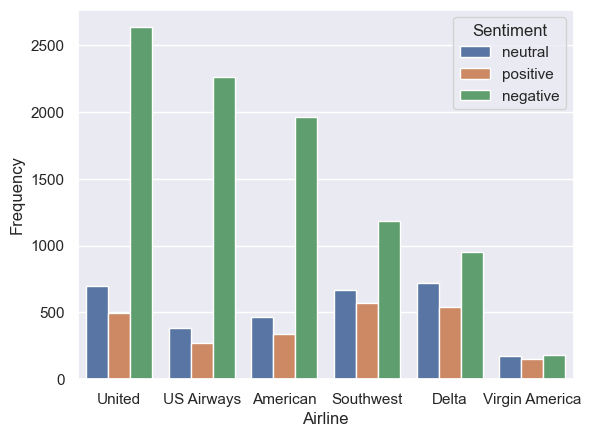

In [ ]:
# barplot shows review numbers of each airline, as well as the frequency of sentiment
sns.set(style="darkgrid")
sns.countplot(x = 'airline', data = airline, hue = 'airline_sentiment', order = airline['airline'].value_counts().index)
plt.xlabel('Airline')
plt.ylabel('Frequency')
plt.legend().set_title('Sentiment')
plt.show()

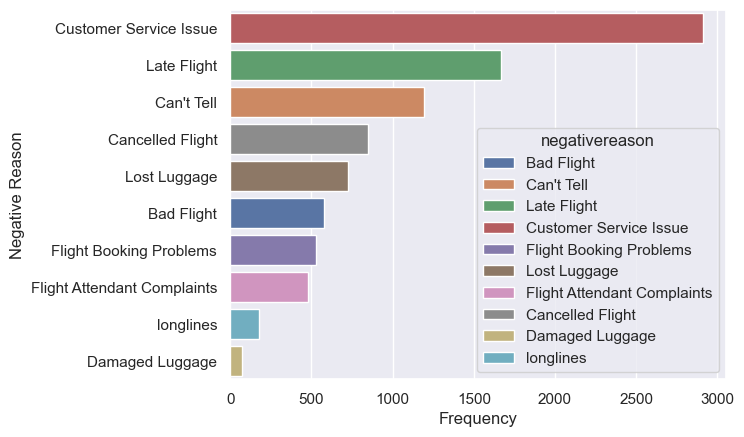

In [ ]:
# barplot shows the frequency of the different negative reasons          
sns.set(style="darkgrid")
sns.countplot(y = 'negativereason', data = airline, order = airline['negativereason'].value_counts().index, hue = 'negativereason')
plt.xlabel('Frequency')
plt.ylabel('Negative Reason')
plt.show()

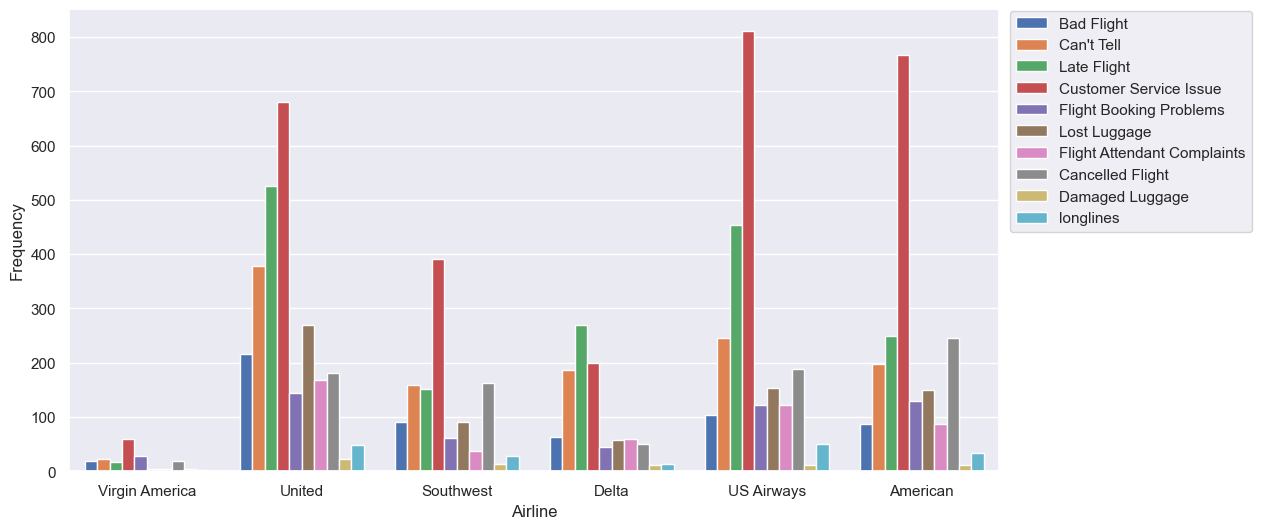

In [ ]:
# barplot shows the distribution of negative reasons on each airlines
plt.figure(figsize=(12, 6))
sns.countplot(x = 'airline', data = airline, hue = 'negativereason', saturation = True)
plt.xlabel('Airline')
plt.ylabel('Frequency')
plt.legend(bbox_to_anchor = (1.01, 1), loc = 2, borderaxespad = 0.1)
plt.show() 

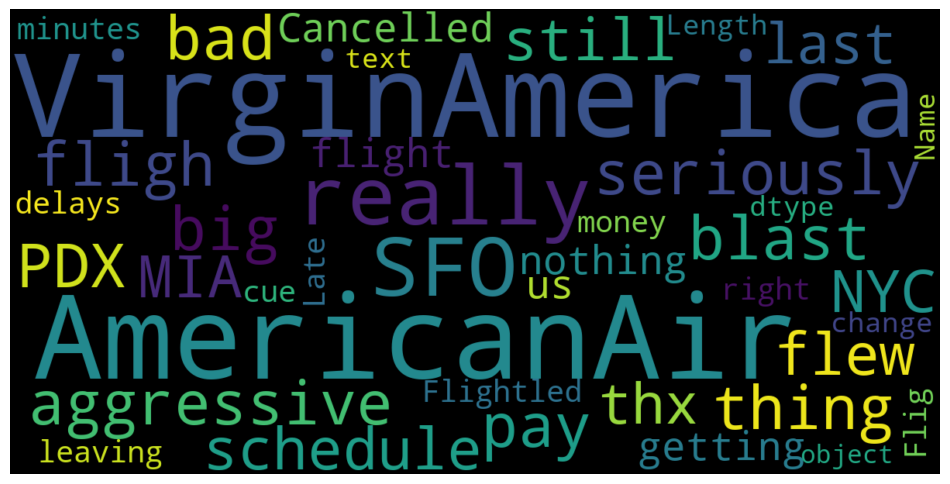

In [ ]:
# show word cloud graph
from wordcloud import WordCloud, STOPWORDS
stopwords_forCloud = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color = 'black',
        #contour_width = 3, 
        #contour_color = 'steelblue',
        stopwords = stopwords_forCloud,
        max_words = 80,
        max_font_size = 50, 
        scale = 3,
        random_state = 1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    plt.figure(1, figsize = (12, 12))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.show()

# show word cloud with negative sentiment
airline_neg = airline.loc[airline['airline_sentiment'] == 'negative']   # select rows with negative sentiment
show_wordcloud(airline_neg['text'])     

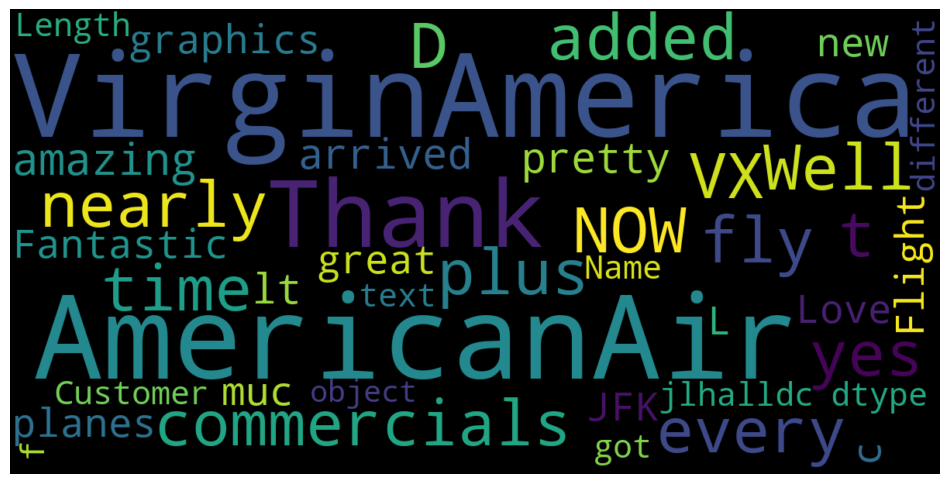

In [ ]:
# show word cloud with positive sentiment
airline_neg = airline.loc[airline['airline_sentiment'] == 'positive']   # select rows with positive sentiment
show_wordcloud(airline_neg['text'])     

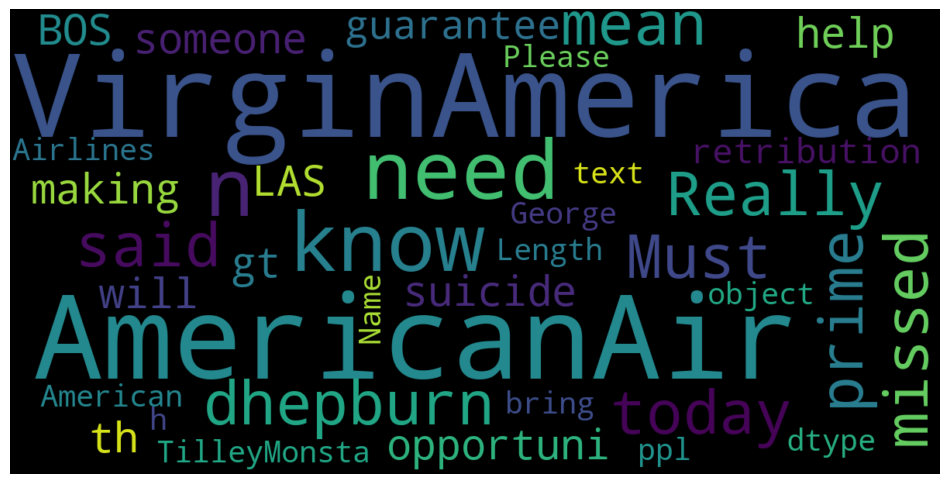

In [ ]:
# show word cloud with neutral sentiment
airline_neg = airline.loc[airline['airline_sentiment'] == 'neutral']   # select rows with neutral sentiment
show_wordcloud(airline_neg['text'])     

##### 2. Multivariate Analysis: analyzing the interactions between variables, and analyzing their correlations.

### <font color='red'> Which variable can be used as the independent variable? which variable can be used as the dependent variable? </font>

#### Step 3: Data Quality Evaluation
##### Check missing data, imbalanced data, constant values, duplicates, highly correlated or redundant features, etc.

In [ ]:
airline.loc[:, ('airline_sentiment', 'text')].isnull().sum() 

airline_sentiment    0
text                 0
dtype: int64

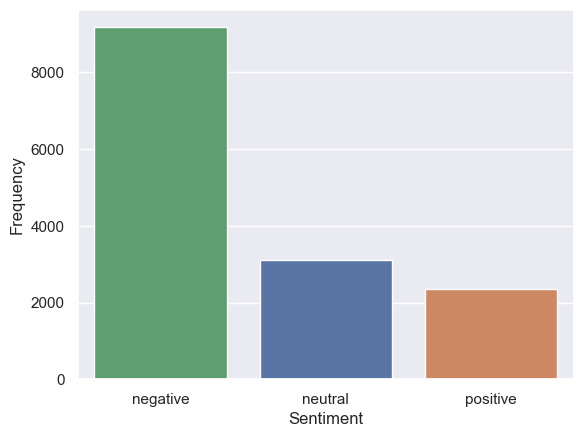

In [ ]:
sns.set(style="darkgrid")
sns.countplot(x = 'airline_sentiment', data = airline, order = airline['airline_sentiment'].value_counts().index, hue = 'airline_sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

In [ ]:

### Workshop3: Text Preprocessing


In [ ]:
df = pd.read_csv('/Users/thuptenwangpo/Documents/GitHub/sentimentAnalysisUsingMachineLearningModels/data/Tweets.csv')
df.columns 

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
def preprocess_text(df):
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()

    def process_text(text):
        text = text.lower()  # Lowercase
        text = re.sub(r'@\w+', '', text)  # Remove user mentions
        text = re.sub(r'http\S+', '', text)  # Remove URLs
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = re.sub(r'\d+', '', text)  # Remove numeric numbers
        tokens = nltk.word_tokenize(text)
        tokens = [token for token in tokens if token not in stop_words]  # Remove stop words
        # Choose either stemming or lemmatization (comment out the one you don't need)
        # tokens = [stemmer.stem(token) for token in tokens]  # Stemming
        tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Lemmatization
        return ' '.join(tokens)

    df['processed_text'] = df['text'].apply(process_text)
    return df


In [ ]:
preprocess_text(df)
print(df.columns)

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone', 'processed_text'],
      dtype='object')


In [ ]:
### workshop 4


In [ ]:
Ns = list()

for i in range(100):
    Ns.append(i+1)

for N in Ns:
    vectorizer = TfidfVectorizer(ngram_range=(1, N))
    tfidf_matrix = vectorizer.fit_transform(df['processed_text'])
    print("Shape of TF-IDF matrix with ngram_range (1,", N, "):", tfidf_matrix.shape)

Shape of TF-IDF matrix with ngram_range (1, 1 ): (14640, 11802)
Shape of TF-IDF matrix with ngram_range (1, 2 ): (14640, 90166)
Shape of TF-IDF matrix with ngram_range (1, 3 ): (14640, 183322)
Shape of TF-IDF matrix with ngram_range (1, 4 ): (14640, 267481)
Shape of TF-IDF matrix with ngram_range (1, 5 ): (14640, 339479)
Shape of TF-IDF matrix with ngram_range (1, 6 ): (14640, 399604)
Shape of TF-IDF matrix with ngram_range (1, 7 ): (14640, 448639)
Shape of TF-IDF matrix with ngram_range (1, 8 ): (14640, 487483)
Shape of TF-IDF matrix with ngram_range (1, 9 ): (14640, 517125)
Shape of TF-IDF matrix with ngram_range (1, 10 ): (14640, 538646)
Shape of TF-IDF matrix with ngram_range (1, 11 ): (14640, 553333)
Shape of TF-IDF matrix with ngram_range (1, 12 ): (14640, 562564)
Shape of TF-IDF matrix with ngram_range (1, 13 ): (14640, 567837)
Shape of TF-IDF matrix with ngram_range (1, 14 ): (14640, 570542)
Shape of TF-IDF matrix with ngram_range (1, 15 ): (14640, 571772)
Shape of TF-IDF matri

In [ ]:
## WOrkshop 5


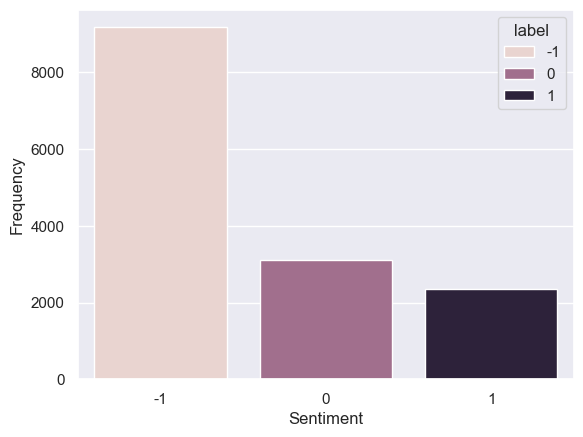

label
-1    9178
 0    3099
 1    2363
Name: count, dtype: int64
Entire dataset (14640, 16)
Train dataset (11712, 16)
Test dataset (2928, 16)
Train dataset class distribution: 
 label
-1    7361
 0    7361
 1    7361
Name: count, dtype: int64


In [ ]:
airline_sub = pd.read_csv('/Users/thuptenwangpo/Documents/GitHub/sentimentAnalysisUsingMachineLearningModels/data/Tweets.csv')
# Create target variable
airline_sub['label'] = airline_sub['airline_sentiment'].map({'negative': -1, 'neutral': 0, 'positive': 1}) # Negative: -1, neutral: 0, positive 1
airline_sub.head(5)
# Barplot shows the number neutral, positive and neguative reviews.
sns.set(style="darkgrid")
sns.countplot(x = 'label', data = airline_sub, order = airline_sub['label'].value_counts().index, hue = 'label')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

print(airline_sub['label'].value_counts())
random.seed(1234567)

train_X, test_X, train_y, test_y = train_test_split(airline_sub, airline_sub['label'], test_size = 0.2, random_state = 101)
print('Entire dataset', airline_sub.shape)
print('Train dataset', train_X.shape)
print('Test dataset', test_X.shape)

def oversampling(train_X):
    df_major_neg = train_X[train_X['label'] == -1]
    df_minor_neu = train_X[train_X['label'] == 0]
    df_minor_pos = train_X[train_X['label'] == 1]        

    if len(df_major_neg) == 0:
        print("Warning: Majority class is empty. Skipping oversampling.")
        return train_X

    major_count = len(df_major_neg)
 
    df_minor_neu_oversampled = resample(df_minor_neu, 
                                 replace=True,              
                                 n_samples=major_count,     
                                 random_state=1000)    

    df_minor_pos_oversampled = resample(df_minor_pos, 
                                 replace=True,             
                                 n_samples=major_count,   
                                 random_state=1000)      
         
    trainX = pd.concat([df_major_neg, df_minor_neu_oversampled, df_minor_pos_oversampled])
    print("Train dataset class distribution: \n", trainX.label.value_counts())
    trainX = shuffle(trainX, random_state=200) 
    return trainX

train_X = oversampling(train_X)

In [ ]:
def undersampling(train_X):
    df_major_neg = train_X[train_X['label'] == -1]
    df_minor_neu = train_X[train_X['label'] == 0]
    df_minor_pos = train_X[train_X['label'] == 1]    

    minority_count = min(len(df_minor_neu), len(df_minor_pos))

    if minority_count == 0:
        print("Warning: At least one minority class is empty. Skipping undersampling.")
        return train_X  

    df_major_neg_undersampled = resample(df_major_neg, 
                                 replace=False,    
                                 n_samples=minority_count,  
                                 random_state=1000) 

    trainX = pd.concat([df_major_neg_undersampled, df_minor_neu, df_minor_pos]) 
    print("Train dataset class distribution: \n", trainX.label.value_counts())
    trainX = shuffle(trainX, random_state=200) 
    return trainX
undersampling(train_X)

Train dataset class distribution: 
 label
-1    7361
 0    7361
 1    7361
Name: count, dtype: int64


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,label
14441,5.696160e+17,neutral,0.6997,NaN,0.0000,American,NaN,KiraMercedes_,NaN,0,@AmericanAir where do I look for cabin crew va...,NaN,2/22/15 13:53,NaN,London,0
9465,5.699220e+17,negative,1.0000,Lost Luggage,1.0000,US Airways,NaN,Andyba25,NaN,0,@USAirways I am in meetings in California and ...,NaN,2/23/15 10:08,South,NaN,-1
12825,5.700070e+17,positive,1.0000,NaN,NaN,American,NaN,CorsoSystems,NaN,0,"@AmericanAir Thank you for the response, we go...",NaN,2/23/15 15:46,"Chicago, IL",NaN,1
3378,5.684820e+17,neutral,1.0000,NaN,NaN,United,NaN,Ssanchik,NaN,0,@united DM the conf # to you - did you receive...,NaN,2/19/15 10:48,NaN,NaN,0
11779,5.677630e+17,negative,1.0000,Flight Booking Problems,0.7080,US Airways,NaN,shoobe01,NaN,0,@usairways If I could/wanted to call I wouldn'...,NaN,2/17/15 11:10,"Mission, Kansas",NaN,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,5.688300e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,AirlineFuel,NaN,0,"@VirginAmerica gives positive outlook, but see...",NaN,2/20/15 9:52,Global,Sydney,0
1342,5.698100e+17,neutral,0.6652,NaN,0.0000,United,NaN,Kwilusz1,NaN,0,@united yes please. Going to drive the 6 hours.,NaN,2/23/15 2:43,NaN,Quito,0
520,5.702980e+17,negative,0.6547,Customer Service Issue,0.3331,United,NaN,Nikki62878,NaN,0,@united I did start a claim but 8-10 weeks is ...,NaN,2/24/15 11:05,NaN,NaN,-1
11023,5.686070e+17,neutral,1.0000,NaN,NaN,US Airways,NaN,Allisonjones704,NaN,0,"@USAirways but it's not their fault, because t...",NaN,2/19/15 19:02,NaN,NaN,0


In [16]:
## Workshop 6

In [ ]:

def airline_NB(df, feature, ngram, sample_method):    
    random.seed(1234567)
        
    if feature == "TF":
        vector = CountVectorizer(analyzer = 'word', ngram_range=(1, ngram)) 
    elif feature == "TFIDF":        
        vector = TfidfVectorizer(ngram_range=(1, ngram)) 
        
    train_X, test_X, train_y, test_y = train_test_split(df, df['label'], test_size = 0.2, random_state = 101)
        
    if sample_method == "undersampling":
        train_X = undersampling(train_X) 
    
    elif sample_method == "oversampling":    
        train_X = oversampling(train_X)   
              
    pipe = make_pipeline(vector, MultinomialNB(alpha = 1.0, fit_prior = True))
    clf = pipe.fit(train_X['processed_text'], train_X['label'])     
    
    test_y_hat = pipe.predict(test_X['processed_text'])
       
    df_result = test_X.copy()
    df_result['prediction'] = test_y_hat.tolist()   
    
    df_prob = pd.DataFrame(pipe.predict_proba(test_X['processed_text']), columns = pipe.classes_)
    df_prob.index = df_result.index
    df_prob.columns = ['probability_negative', 'probability_neutral', 'probability_positive']

    df_final = pd.concat([df_result, df_prob], axis = 1)
    
    file_name = '/Users/thuptenwangpo/Documents/GitHub/sentimentAnalysisUsingMachineLearningModels/nbResults/NB_' + str(ngram) + '_' + sample_method 
    df_final.to_csv(file_name + '.csv')       
    
    print("-----------------------------------------")
    print("NB classification report -- ", "feature: %s/" %feature, "ngram: %d/" %ngram, "sample_method: %s/" %sample_method)
    print(pd.crosstab(test_y.to_numpy(), test_y_hat, rownames = ['True'], colnames = ['Predicted'], margins = True))      

    print("-----------------------------------------")
    print(classification_report(test_y, test_y_hat))    
    print('Macro F1 Score: {:.2f}'.format(f1_score(test_y_hat, test_y, average = 'macro')))  
    print('Weighted F1 Score: {:.2f}'.format(f1_score(test_y_hat, test_y, average = 'weighted')))

In [ ]:

def airline_DT(df, feature, ngram, sample_method):    
    random.seed(1234567)

    if feature == "TF":
        vector = CountVectorizer(analyzer = 'word', ngram_range=(1, ngram)) 
    elif feature == "TFIDF":        
        vector = TfidfVectorizer(ngram_range=(1, ngram)) 

    train_X, test_X, train_y, test_y = train_test_split(df, df['label'], test_size = 0.2, random_state = 101)

    if sample_method == "undersampling":
        train_X = undersampling(train_X) 
    elif sample_method == "oversampling":    
        train_X = oversampling(train_X)   

    pipe = make_pipeline(vector, DecisionTreeClassifier(random_state=1000))
    clf = pipe.fit(train_X['processed_text'], train_X['label'])     

    test_y_hat = pipe.predict(test_X['processed_text'])

    df_result = test_X.copy()
    df_result['prediction'] = test_y_hat.tolist()   


    file_name = '/Users/thuptenwangpo/Documents/GitHub/sentimentAnalysisUsingMachineLearningModels/DT_Results/DT_' + str(ngram) + '_' + sample_method 
    df_result.to_csv(file_name + '.csv')       

    print("-----------------------------------------")
    print("DT classification report -- ", "feature: %s/" %feature, "ngram: %d/" %ngram, "sample_method: %s/" %sample_method)
    print(pd.crosstab(test_y.to_numpy(), test_y_hat, rownames = ['True'], colnames = ['Predicted'], margins = True))      

    print("-----------------------------------------")
    print(classification_report(test_y, test_y_hat))    
    print('Macro F1 Score: {:.2f}'.format(f1_score(test_y_hat, test_y, average = 'macro')))  
    print('Weighted F1 Score: {:.2f}'.format(f1_score(test_y_hat, test_y, average = 'weighted')))

In [ ]:
##Workshop 7
df = df.rename(columns={'airline_sentiment': 'label'})

In [ ]:
airline_DT(df, "TF", 1, "none")  
airline_DT(df, "TF", 1, "oversampling")  
airline_DT(df, "TF", 1, "undersampling")  

airline_DT(df, "TF", 2, "none")  
airline_DT(df, "TF", 2, "oversampling")  
airline_DT(df, "TF", 2, "undersampling")  

airline_DT(df, "TF", 3, "none")
airline_DT(df, "TF", 3, "oversampling")
airline_DT(df, "TF", 3, "undersampling") 

airline_DT(df, "TFIDF", 1, "none")  
airline_DT(df, "TFIDF", 1, "oversampling")  
airline_DT(df, "TFIDF", 1, "undersampling")  

airline_DT(df, "TFIDF", 2, "none")  
airline_DT(df, "TFIDF", 2, "oversampling")  
airline_DT(df, "TFIDF", 2, "undersampling")  

airline_DT(df, "TFIDF", 3, "none")
airline_DT(df, "TFIDF", 3, "oversampling")
airline_DT(df, "TFIDF", 3, "undersampling") 

-----------------------------------------
DT classification report --  feature: TF/ ngram: 1/ sample_method: none/
Predicted  negative  neutral  positive   All
True                                        
negative       1463      264        90  1817
neutral         271      295        62   628
positive        135       91       257   483
All            1869      650       409  2928
-----------------------------------------
              precision    recall  f1-score   support

    negative       0.78      0.81      0.79      1817
     neutral       0.45      0.47      0.46       628
    positive       0.63      0.53      0.58       483

    accuracy                           0.69      2928
   macro avg       0.62      0.60      0.61      2928
weighted avg       0.69      0.69      0.69      2928

Macro F1 Score: 0.61
Weighted F1 Score: 0.69
-----------------------------------------
DT classification report --  feature: TF/ ngram: 1/ sample_method: oversampling/
Predicted  negative  neu

In [ ]:
airline_NB(df, "TF", 1, "none")  
airline_NB(df, "TF", 1, "oversampling")  
airline_NB(df, "TF", 1, "undersampling")  

airline_NB(df, "TF", 2, "none")  
airline_NB(df, "TF", 2, "oversampling")  
airline_NB(df, "TF", 2, "undersampling")  

airline_NB(df, "TF", 3, "none")
airline_NB(df, "TF", 3, "oversampling")
airline_NB(df, "TF", 3, "undersampling") 

airline_NB(df, "TFIDF", 1, "none")  
airline_NB(df, "TFIDF", 1, "oversampling")  
airline_NB(df, "TFIDF", 1, "undersampling")  

airline_NB(df, "TFIDF", 2, "none")  
airline_NB(df, "TFIDF", 2, "oversampling")  
airline_NB(df, "TFIDF", 2, "undersampling")  

airline_NB(df, "TFIDF", 3, "none")
airline_NB(df, "TFIDF", 3, "oversampling")
airline_NB(df, "TFIDF", 3, "undersampling") 

-----------------------------------------
NB classification report --  feature: TF/ ngram: 1/ sample_method: none/
Predicted  negative  neutral  positive   All
True                                        
negative       1730       62        25  1817
neutral         353      231        44   628
positive        170       45       268   483
All            2253      338       337  2928
-----------------------------------------
              precision    recall  f1-score   support

    negative       0.77      0.95      0.85      1817
     neutral       0.68      0.37      0.48       628
    positive       0.80      0.55      0.65       483

    accuracy                           0.76      2928
   macro avg       0.75      0.62      0.66      2928
weighted avg       0.75      0.76      0.74      2928

Macro F1 Score: 0.66
Weighted F1 Score: 0.78
-----------------------------------------
NB classification report --  feature: TF/ ngram: 1/ sample_method: oversampling/
Predicted  negative  neu